In [1]:
# Libs:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lendo os dados:

Base_dados = pd.read_csv('Dados_Indendio (1).csv', encoding = 'latin-1')

Base_dados.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [3]:
# Nulos:

Base_dados.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

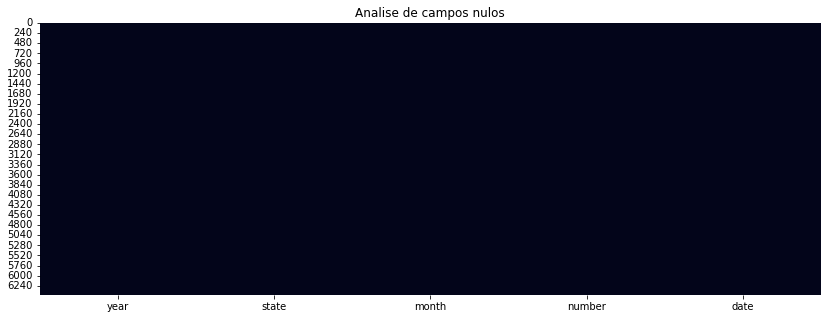

In [4]:
# Nulos plot:

plt.figure(figsize = (14,5))
plt.title('Analise de campos nulos')
sns.heatmap(Base_dados.isnull(), cbar = False);

In [5]:
# Estatísticas

Base_dados.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [6]:
Base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [7]:
# Campos únicos

Base_dados.nunique()

year        20
state       23
month       12
number    1479
date        20
dtype: int64

In [8]:
Base_dados.shape

(6454, 5)

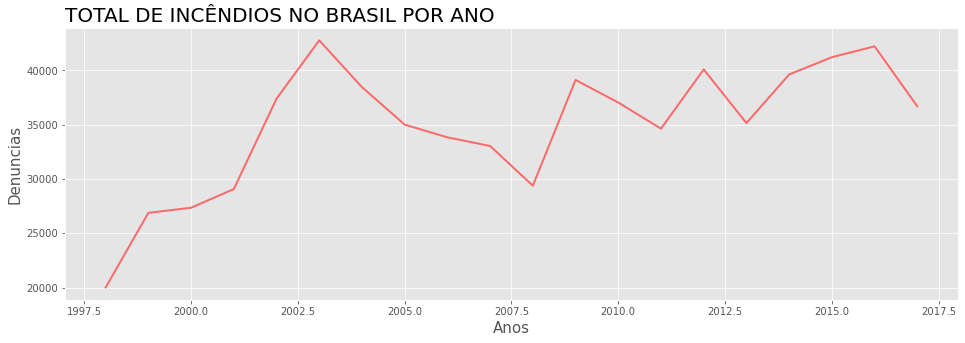

In [9]:
# Analise por ano dos incêndios:

Analise = Base_dados.groupby(by=['year']).sum().reset_index()

Analise.head()

# Gráfico:
plt.figure(figsize = (16,5))
plt.style.use('ggplot')
plt.title('TOTAL DE INCÊNDIOS NO BRASIL POR ANO',loc = 'left', fontsize = 20)
sns.lineplot(data = Analise, x = 'year', y = 'number', estimator = 'sum', lw=2, color = '#ff5555', alpha = 0.85)
plt.xlabel('Anos', fontsize = 15)
plt.ylabel('Denuncias', fontsize = 15);

In [10]:
# Analise por mês dos incêndios:

Analise2 = Base_dados.groupby(by=['year','month']).sum().reset_index()

Analise2.head()

,year,month,number
0,1998,Abril,0.000
1,1998,Agosto,3964.616
2,1998,Dezembro,2043.407
3,1998,Fevereiro,0.000
4,1998,Janeiro,0.000


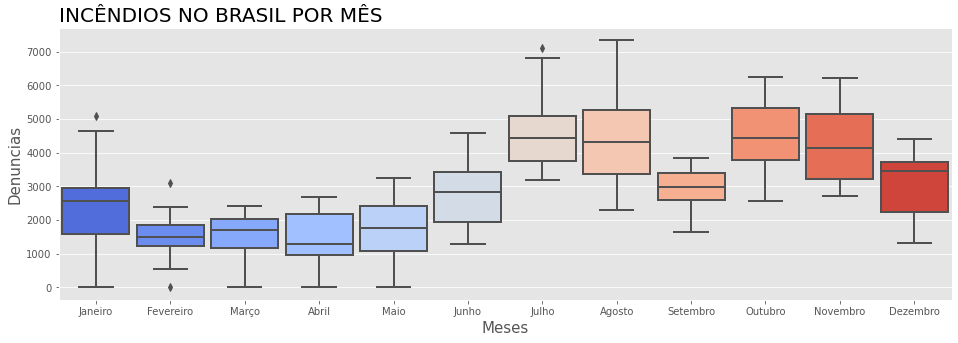

In [11]:
plt.figure(figsize = (16,5))
plt.title('INCÊNDIOS NO BRASIL POR MÊS',loc = 'left', fontsize = 20)
sns.boxplot(data = Analise2, x = 'month', y = 'number',palette = 'coolwarm',saturation = 1,width=0.9,linewidth=2,
            order = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']
           )
plt.xlabel('Meses', fontsize = 15)
plt.ylabel('Denuncias', fontsize = 15);

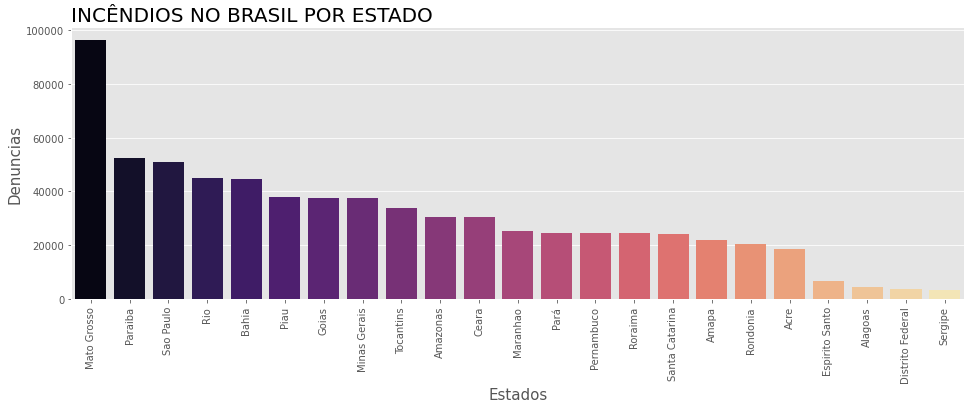

In [12]:
# Analise por ano dos incêndios:

Analise3 = Base_dados.groupby(by=['state']).sum().reset_index()[['state','number']].sort_values('number',ascending=False)

Analise3.head()

plt.figure(figsize = (16,5))
plt.title('INCÊNDIOS NO BRASIL POR ESTADO',loc = 'left', fontsize = 20)
#plt.bar(Analise3.state, Analise3['number'], palette = 'coolwarm', saturation = 1, width=0.9, linewidth=2)
sns.barplot(x = Analise3['state'], y = Analise3['number'], palette = "magma",alpha = 1)
plt.xlabel('Estados', fontsize = 15)
plt.ylabel('Denuncias', fontsize = 15)
plt.xticks(rotation = 90);

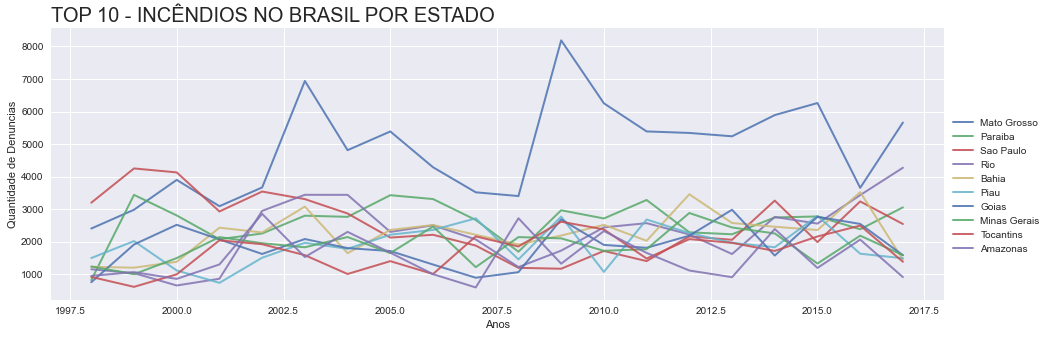

In [70]:
Lista_top10 = Analise3['state'][0:10].values

Lista_top10
#Configurações:
plt.figure(figsize = (16,5))
plt.title('TOP 10 - INCÊNDIOS NO BRASIL POR ESTADO',loc = 'left', fontsize = 20)

#loop:
for Coluna in Lista_top10:
    
    #Filtrar o estado:
    Filtro = Base_dados.loc[Base_dados['state'] == Coluna]
    
    #Agrupar os valores para sumarizar:
    Analise_local = Filtro.groupby(by=['year']).sum().reset_index()
    
    #Plot:
    sns.lineplot(data = Analise_local, x = 'year', y = 'number', palette = "magma",lw=2, alpha = 0.85)
    
plt.xlabel('Anos')
plt.ylabel('Quantidade de Denuncias');

#Legenda:

plt.legend(Lista_top10, bbox_to_anchor = (1, 0.7) );

   

In [14]:
# Plot Geográfico

# Gerando os estados
Estados = Analise3.sort_values('state')['state'].values

# Gerando os valores
Valores = Analise3.sort_values('state')['number'].values

# Latitudes
Lat = [ -8.77, -9.71,	1.41, -3.07,	-12.96, -3.71, -15.83, -19.19, -16.64, -2.55,	-12.64,	
       -18.10, -7.06, -5.53, -8.28, -8.28,	-22.84,	-11.22,	1.89,	-27.33,	-23.55,	-10.90,	-10.25 ]

# Longitudes
Log = [ -70.55,	-35.73,	-51.77,	-61.66,	-38.51,	-38.54,	-47.86,	-40.34,	-49.31,	-44.30,	-55.42,	-44.38,	
       -35.55,	-52.29,	-35.07,	-43.68,	-43.15,	-62.80,	-61.22,	-49.44,	-46.64,	-37.07,	-48.25 ]

# Organizados os dados
Dicionario = {
    'Estados' : Estados,
    'Latitude' : Lat,
    'Longitude' : Log,
    'Incêndios' : Valores
}

# Lendo o dicionario
Analise_Geografica = pd.DataFrame ( Dicionario )

Analise_Geografica.head()

,Estados,Latitude,Longitude,Incêndios
0,Acre,-8.77,-70.55,18464.030
1,Alagoas,-9.71,-35.73,4644.000
2,Amapa,1.41,-51.77,21831.576
3,Amazonas,-3.07,-61.66,30650.129
4,Bahia,-12.96,-38.51,44746.226


In [49]:
# Fazendo o plot
import plotly.express as px

# Mapa de CAlor Geografico
px.density_mapbox(
    Analise_Geografica,
    lat='Latitude',
    lon='Longitude',
    z='Incêndios',
    radius=30,
    center=dict(lat=-12.700, lon=-46.5555),
    zoom=3,
    mapbox_style='stamen-terrain'
)

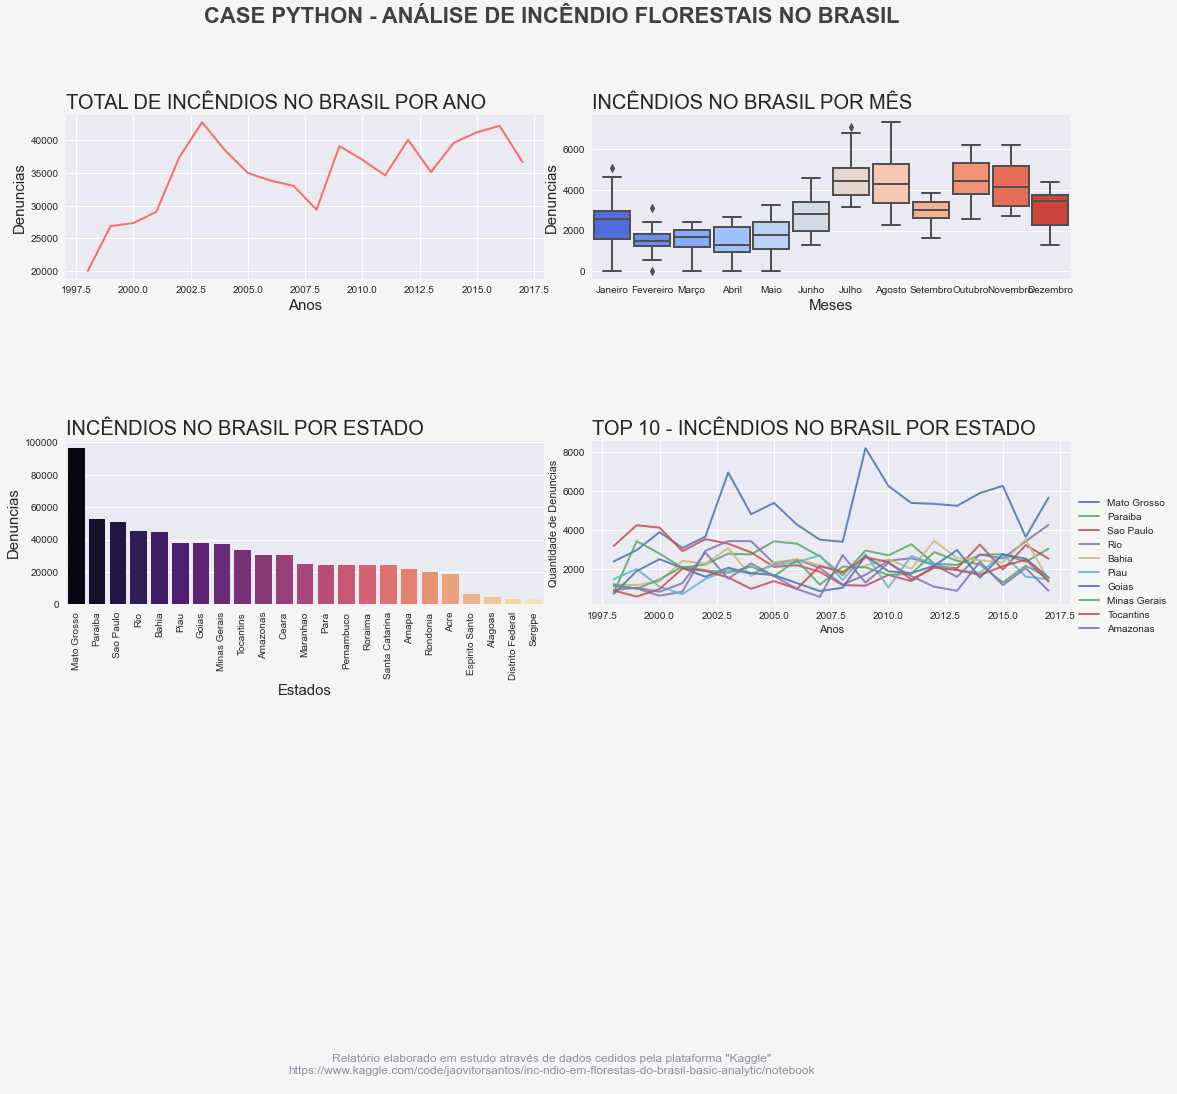

In [71]:
#RELATÓRIO GERAL:

#Tamanho da imagem:
fig,ax = plt.subplots(figsize = (18,15))

# Cor de fundo:
cor_fundo = '#f5f5f5'
ax.set_facecolor(cor_fundo)
fig.set_facecolor(cor_fundo)

# Estilo dos gráficos:
plt.style.use('seaborn')

# Título do dashboard:
plt.suptitle('CASE PYTHON - ANÁLISE DE INCÊNDIO FLORESTAIS NO BRASIL', fontsize = 22, color = '#404040', fontweight = 600)

# Parametros para o grid:
Linhas = 3
Colunas = 2

# Acessando o gráfico 1:
plt.subplot(Linhas, Colunas, 1)
plt.title('TOTAL DE INCÊNDIOS NO BRASIL POR ANO',loc = 'left', fontsize = 20)
sns.lineplot(data = Analise, x = 'year', y = 'number', estimator = 'sum', lw=2, color = '#ff5555', alpha = 0.85)
plt.xlabel('Anos', fontsize = 15)
plt.ylabel('Denuncias', fontsize = 15)

# Acessando o gráfico 2:
plt.subplot(Linhas, Colunas, 2)
plt.title('INCÊNDIOS NO BRASIL POR MÊS',loc = 'left', fontsize = 20)
sns.boxplot(data = Analise2, x = 'month', y = 'number',palette = 'coolwarm',saturation = 1,width=0.9,linewidth=2,
            order = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']
           )
plt.xlabel('Meses', fontsize = 15)
plt.ylabel('Denuncias', fontsize = 15)

# Acessando o gráfico 3:
plt.subplot(Linhas, Colunas, 3)
plt.title('INCÊNDIOS NO BRASIL POR ESTADO',loc = 'left', fontsize = 20)
sns.barplot(x = Analise3['state'], y = Analise3['number'], palette = "magma",alpha = 1)
plt.xlabel('Estados', fontsize = 15)
plt.ylabel('Denuncias', fontsize = 15)
plt.xticks(rotation = 90)

# Acessando o gráfico 4:
plt.subplot(Linhas, Colunas, 4)
plt.title('TOP 10 - INCÊNDIOS NO BRASIL POR ESTADO',loc = 'left', fontsize = 20)
#loop:
for Coluna in Lista_top10:
    #Filtrar o estado:
    Filtro = Base_dados.loc[Base_dados['state'] == Coluna]
    #Agrupar os valores para sumarizar:
    Analise_local = Filtro.groupby(by=['year']).sum().reset_index()
    #Plot:
    sns.lineplot(data = Analise_local, x = 'year', y = 'number',palette = "magma", lw=2, alpha = 0.85) 
plt.xlabel('Anos')
plt.ylabel('Quantidade de Denuncias')
#Legenda:
plt.legend(Lista_top10, bbox_to_anchor = (1, 0.7) );

# Ajustar o layout:
plt.subplots_adjust(hspace = 0.99, wspace = 0.10)

# Rodapé:
Rodape = '''
Relatório elaborado em estudo através de dados cedidos pela plataforma "Kaggle"
https://www.kaggle.com/code/jaovitorsantos/inc-ndio-em-florestas-do-brasil-basic-analytic/notebook
'''

# Incluindo o rodape no relatorio
fig.text( 0.5, -0.02, Rodape, ha='center', va='bottom', size=12, color='#938ca1');